# Canadian Immigration & Housing Analysis

This notebook explores the trends in immigration to Canada over the years and compares them with housing completions. Additionally, we investigate whether political parties in power had any noticeable impact on these trends.


## Importing Required Libraries

We start by importing the necessary Python libraries for data handling and visualization.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("canadian_immigration_data1980-2024.csv")

In [2]:
data.columns

Index(['Country', 'ISO Code', 'Continent', 'Region', 'DevName', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Total',
       'July - 2024'],
      dtype='object')

In [3]:
data.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2017,2018,2019,2020,2021,2022,2023,2024,Total,July - 2024
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,193.000000
mean,1281.857143,1265.492063,1192.677249,871.465608,855.259259,816.291005,980.915344,1517.804233,1593.825397,1885.846561,...,2963.989637,3321.891192,3530.051813,1910.000000,4201.347150,4529.818653,4883.056995,5017.668394,1.076860e+05,3141.658031
std,10560.072806,9565.444213,8973.876106,6570.439245,6504.523340,6202.262560,7300.075903,11217.055446,11983.770620,14141.639550,...,21201.004224,23807.115471,25409.341361,13676.775565,30663.392584,32700.958687,35456.614785,36361.531931,7.814387e+05,22764.531905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,60.000000,60.000000,55.000000,35.000000,55.000000,60.000000,70.000000,56.000000,1.858000e+03,35.000000
50%,15.000000,16.000000,14.000000,16.000000,21.000000,23.000000,23.000000,43.000000,43.000000,48.000000,...,230.000000,275.000000,290.000000,170.000000,295.000000,295.000000,275.000000,288.000000,9.191000e+03,180.000000
75%,272.000000,301.000000,299.000000,201.000000,218.000000,208.000000,265.000000,503.000000,489.000000,553.000000,...,880.000000,955.000000,1025.000000,590.000000,1105.000000,1020.000000,1075.000000,1078.000000,3.851800e+04,675.000000
max,143135.000000,128618.000000,121147.000000,89157.000000,88239.000000,84302.000000,99354.000000,152098.000000,161929.000000,192001.000000,...,286535.000000,321055.000000,341175.000000,184600.000000,406050.000000,437625.000000,471815.000000,485000.000000,1.068493e+07,303640.000000


In [4]:
data.head(5)

,Country,ISO Code,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2017,2018,2019,2020,2021,2022,2023,2024,Total,July - 2024
0,Total,TOT,World,NaN,NaN,143135.0,128618.0,121147.0,89157.0,88239.0,...,286535,321055,341175,184600,406050,437625,471815,485000,10684930,303640
1,India,IND,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,...,51590,69985,85590,42875,127945,118250,139785,138732,1584226,86855
2,Philippines,PHL,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,...,40905,35050,27820,10975,18020,22095,26965,32976,858925,20645
3,China,CHN,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,...,30250,29710,30245,16525,31010,31845,31780,30436,962707,19055
4,Nigeria,NGA,Africa,Western Africa,Developing regions,81.0,60.0,58.0,58.0,78.0,...,5445,10920,12600,6360,15595,22130,17465,19615,162570,12280


In [5]:
data = data.iloc[:,:-1]


In [6]:
total = data.iloc[0]
total = total['1980':'2023']

In [7]:
total.isna().sum()

0

## Immigration Trends Over Time

We plot total immigration numbers over the years and color-code them by ruling political party to observe any noticeable patterns.


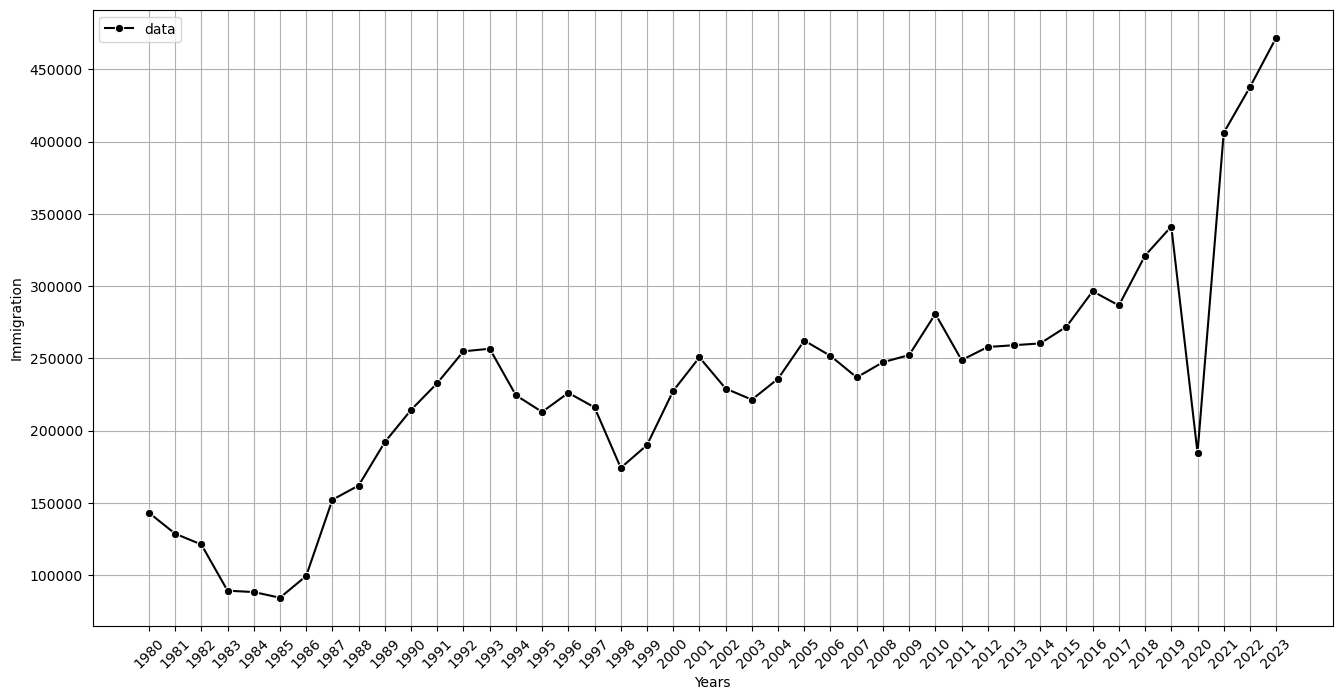

In [8]:
plt.figure(figsize=(16,8))
sns.lineplot(x=total.index, y=total.values, marker='o', label='data', color='black')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Immigration')
plt.legend()
plt.grid(True)
plt.show()

### Political Influence
Adding the ruling party column in the data helps us analyzing the trend or impact of politics on the immigration in canada

In [9]:
ruling_party = {'1980':'Liberals','1981':'Liberals','1982':'Liberals','1983':'Liberals',
                 '1984':'Conservative','1985':'Conservative','1986':'Conservative','1987':'Conservative',
                 '1988':'Conservative','1989':'Conservative','1990':'Conservative','1991':'Conservative',
                 '1992':'Conservative','1993':'Liberals','1994':'Liberals','1995':'Liberals',
                 '1996':'Liberals','1997':'Liberals','1998':'Liberals','1999':'Liberals',
                 '2000':'Liberals','2001':'Liberals','2002':'Liberals','2003':'Liberals',
                 '2000':'Liberals','2001':'Liberals','2002':'Liberals','2003':'Liberals',
                 '2004':'Liberals','2005':'Liberals','2006':'Conservative','2007':'Conservative',
                 '2008':'Conservative','2009':'Conservative','2010':'Conservative','2011':'Conservative',
                 '2012':'Conservative','2013':'Conservative','2014':'Conservative','2015':'Liberals',
                 '2016':'Liberals','2017':'Liberals','2018':'Liberals','2019':'Liberals',
                 '2020':'Liberals','2021':'Liberals','2022':'Liberals','2023':'Liberals'}            

In [10]:
politics_in_canada = pd.DataFrame(
    {
        'imm_total':total,
        'Ruling_Party':pd.Series(ruling_party)
    }
)
politics_in_canada

,imm_total,Ruling_Party
1980,143135.0,Liberals
1981,128618.0,Liberals
1982,121147.0,Liberals
1983,89157.0,Liberals
1984,88239.0,Conservative
1985,84302.0,Conservative
1986,99354.0,Conservative
1987,152098.0,Conservative
1988,161929.0,Conservative
1989,192001.0,Conservative


Plotting the same using the hue to show the political aspect.

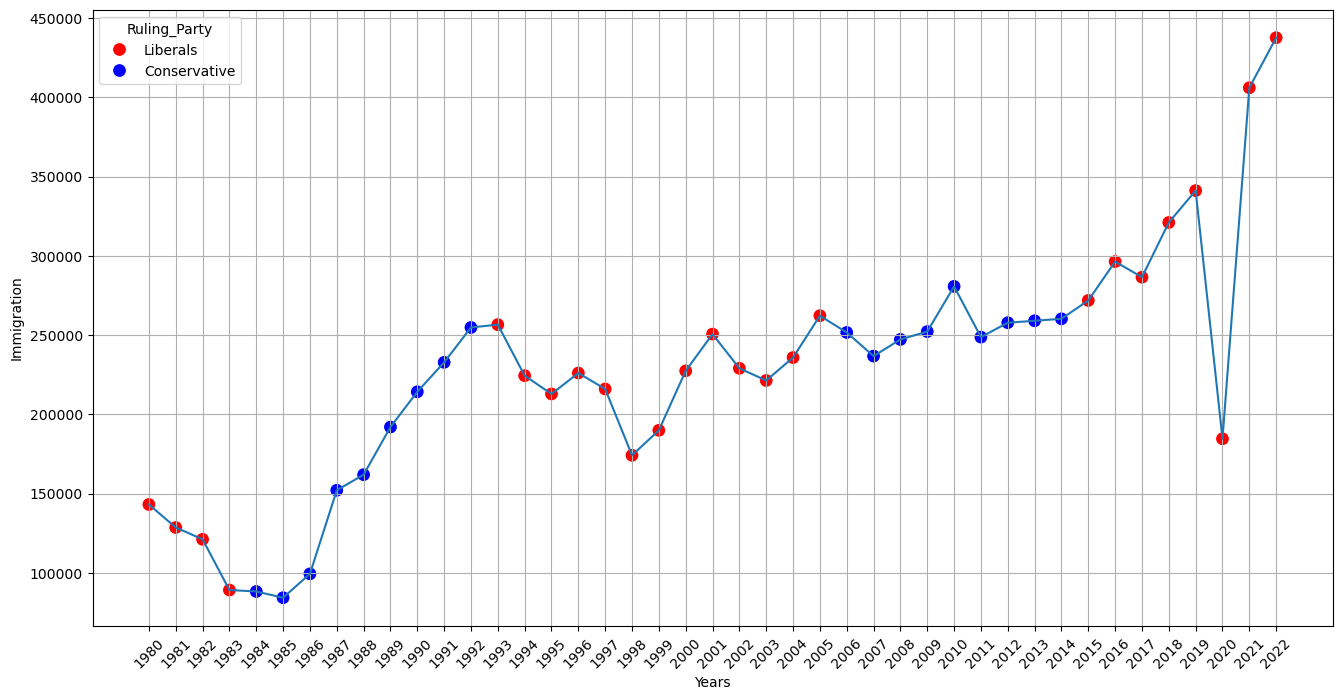

In [39]:
custom = {'Liberals': 'red','Conservative':'blue'}
plt.figure(figsize=(16,8))
ax1 = sns.scatterplot(
                x=politics_in_canada.index,
                y=politics_in_canada['imm_total'], 
                hue=politics_in_canada.Ruling_Party,
                palette=custom,
                s=100)
plt.plot(politics_in_canada.index, politics_in_canada['imm_total'])
plt.xlabel('Years')
plt.ylabel('Immigration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Housing market dataset
Importing the housing market dataset to show the trend/pressure of immigration on country's housing market

In [12]:
hs = pd.read_csv('houses.csv')
hs.head(5)

,Unnamed: 0,Geography,Canada,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,Housing estimates,Type of unit,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,NaN,NaN
1,Housing starts,NaN,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Total units,"158,601","177,973","125,860","162,645","134,900","165,826","199,785","245,986",...,"195,535","197,916","219,763","212,843","208,685","217,880","271,198","261,849",NaN,NaN
3,NaN,Single-detached,"87,721","89,071","54,457","102,385","83,651","98,624","120,008","140,139",...,"68,125","74,089","76,843","65,940","55,869","60,023","82,116","72,647",NaN,NaN
4,NaN,Multiples,"70,880","88,902","71,403","60,260","51,249","67,202","79,777","105,847",...,"127,410","123,827","142,920","146,903","152,816","157,857","189,082","189,202",NaN,NaN


In [13]:
hs = hs.set_index('Unnamed: 0')
hs = hs.loc[['Housing estimates','Housing completions']]

In [14]:
hs

,Geography,Canada,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Housing estimates,Type of unit,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,NaN,NaN
Housing completions,Total units,"176,168","174,996","133,942","163,008","153,012","139,106","184,605","217,976","216,532",...,"194,461","187,605","190,923","200,262","187,177","198,761","222,670","219,942",NaN,NaN


In [15]:
hs.columns = hs.iloc[0]
hs = hs.drop('Housing estimates', axis=0)

In [16]:
hs = hs.iloc[:, :-2]

In [17]:
hs = hs.loc['Housing completions'].reset_index()
hs = hs.iloc[1:]
hs = hs.set_index('Housing estimates')
hs['Housing completions'] = hs['Housing completions'].replace({',': ''}, regex=True).astype(int)

## Immigration vs. Housing Supply

We overlay a line showing annual housing completions to visually assess whether housing construction is keeping pace with immigration.


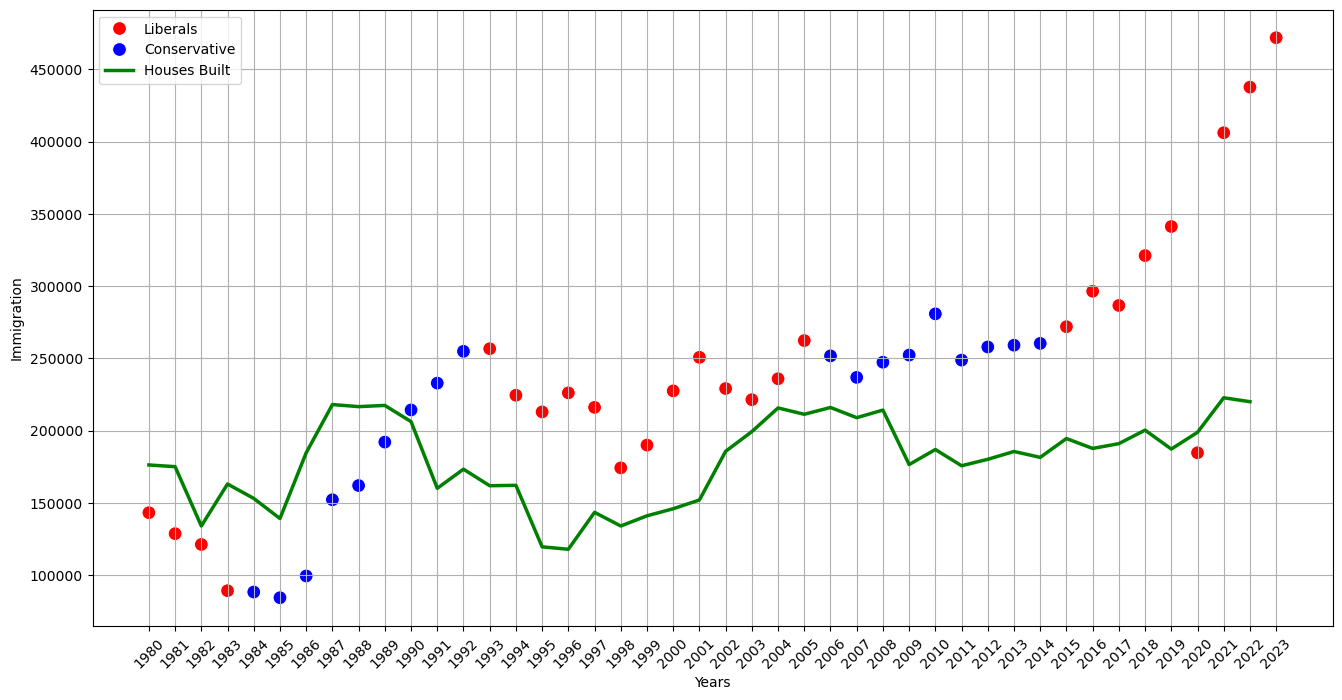

In [18]:
plt.figure(figsize=(16, 8))

ax1 = sns.scatterplot(
                x=politics_in_canada.index,
                y=politics_in_canada['imm_total'], 
                hue=politics_in_canada.Ruling_Party,
                palette=custom,
                s=100)
plt.plot(hs.index, hs['Housing completions'], color='green', linewidth=2.5, label='Houses Built')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Immigration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

It is clear from the graph above that the housing market never got to keep up with the number of immigrants coming to the country hence increasing the pressure and decreasing the affordability

## Immigrant-to-Housing Ratio

We compute the average number of immigrants per house built under each party to gauge whether housing supply matched immigration levels.


In [19]:
politics_in_canada=politics_in_canada[:-1]
df = politics_in_canada.join(hs)
df

,imm_total,Ruling_Party,Housing completions
1980,143135.0,Liberals,176168
1981,128618.0,Liberals,174996
1982,121147.0,Liberals,133942
1983,89157.0,Liberals,163008
1984,88239.0,Conservative,153012
1985,84302.0,Conservative,139106
1986,99354.0,Conservative,184605
1987,152098.0,Conservative,217976
1988,161929.0,Conservative,216532
1989,192001.0,Conservative,217371


In [20]:
party_stats = df.groupby('Ruling_Party')[['imm_total', 'Housing completions']].mean().round(2)
party_stats['imm_per_house'] = (party_stats['imm_total']/party_stats['Housing completions'])
party_stats

,imm_total,Housing completions,imm_per_house
Ruling_Party,,,
Conservative,209679.722222,188496.17,1.112382
Liberals,238155.2,173559.36,1.372183


On average, during Liberal governments, about 1.37 immigrants arrived per house built, compared to 1.11 under Conservatives. While this suggests a slightly higher housing pressure under Liberal governments, the ratio doesn't account for broader housing demand or supply-side dynamics — including domestic needs, emigration, or housing delays.

## Visualizing Party Performance (Grouped Bar Chart)

We use a grouped bar chart to compare immigration and housing data for Liberals vs Conservatives. This helps us quickly see which party had higher numbers.


### Plotting

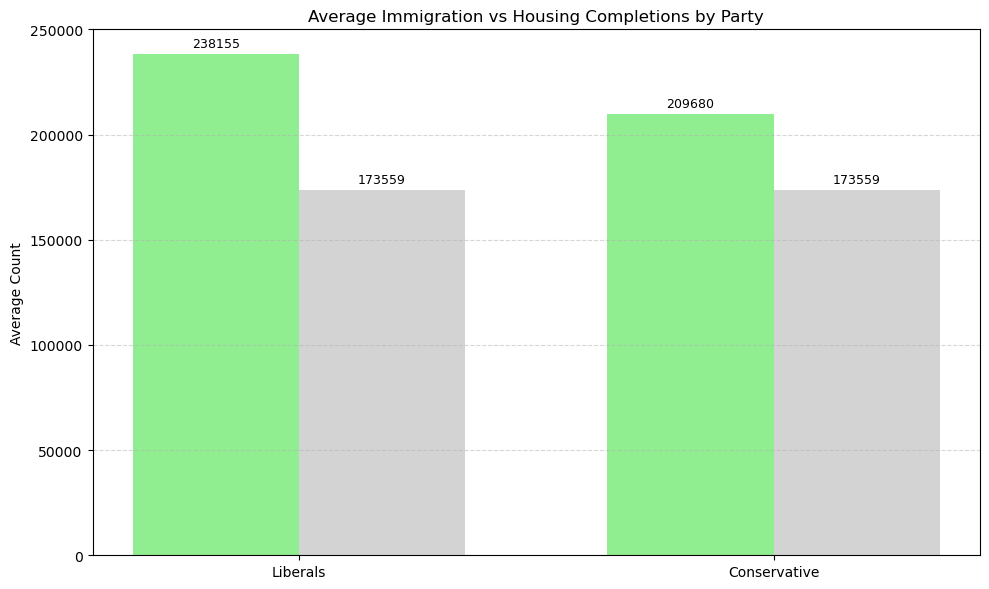

In [21]:
labels = ['Liberals', 'Conservative']
ticks = np.arange(len(labels))
imm_vals = [party_stats.loc['Liberals', 'imm_total'], party_stats.loc['Conservative', 'imm_total']]
houses = [party_stats.loc['Liberals', 'Housing completions'],party_stats.loc['Liberals', 'Housing completions']]
width = 0.35
fig,ax = plt.subplots(figsize=(10,6))
bar1 = ax.bar(ticks-width/2, imm_vals, width, label='immigration', color='lightgreen')
bar2 = ax.bar(ticks+width/2, houses, width, label='Houses built', color='lightgrey')

ax.set_ylabel('Average Count')
ax.set_title('Average Immigration vs Housing Completions by Party')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', alpha=0.5)

for bar_group in [bar1, bar2]:
    for bar in bar_group:
        y = bar.get_height()
        ax.text(bar.get_x()+width/2,y+2000, f'{y:.0f}', ha='center', va='bottom', fontsize=9)
        
plt.tight_layout()
plt.show()

We observed that immigration numbers have increased over time, with both Liberal and Conservative governments overseeing varying levels. However, housing completions have not always kept pace, especially under Liberal governments, leading to a higher immigrant-to-house ratio.

### Crime in the country
Included a crime database that shows the total crime reported per 1000 population. This can be used to analyze any trends

In [22]:
crime = pd.read_csv('crime.csv', skiprows=1)
crime = crime.iloc[0:61]
crime = crime[['Unnamed: 0','Total']].astype(int)
crime = crime.set_index('Unnamed: 0')

In [23]:
df.index = df.index.astype(int)

In [24]:
df = df.join(crime['Total'])

In [25]:
df.rename(columns={'Total': 'Total_crime_per_1000'}, inplace=True)
df

,imm_total,Ruling_Party,Housing completions,Total_crime_per_1000
1980,143135.0,Liberals,176168,8343
1981,128618.0,Liberals,174996,8736
1982,121147.0,Liberals,133942,8773
1983,89157.0,Liberals,163008,8470
1984,88239.0,Conservative,153012,8387
1985,84302.0,Conservative,139106,8413
1986,99354.0,Conservative,184605,8727
1987,152098.0,Conservative,217976,8957
1988,161929.0,Conservative,216532,8919
1989,192001.0,Conservative,217371,8892


#### Data used from STATS CANADA 
Inluded the unemployement rate over the years to compare the trend with growing immigration levels.

In [26]:
years = list(range(1980, 2023))
rates = [
    7.5, 7.6, 11.1, 12.0, 11.3, 10.6, 9.7, 8.8, 7.8, 7.5,
    8.1, 10.3, 11.2, 11.4, 10.4, 9.5, 9.7, 9.1, 8.3, 7.6,
    6.8, 7.2, 7.7, 7.6, 7.2, 6.8, 6.3, 6.2, 6.3, 8.3,
    7.9, 7.5, 7.3, 7.1, 6.9, 6.9, 7.0, 6.4, 5.8, 5.9,
    9.7, 7.5, 5.3
]
unemployment = pd.DataFrame({
    "Year": years,
    "Unemployment Rate (%)": rates
})

In [27]:
unemployment = unemployment.set_index('Year')

In [28]:
df = df.join(unemployment['Unemployment Rate (%)'])
df

,imm_total,Ruling_Party,Housing completions,Total_crime_per_1000,Unemployment Rate (%)
1980,143135.0,Liberals,176168,8343,7.5
1981,128618.0,Liberals,174996,8736,7.6
1982,121147.0,Liberals,133942,8773,11.1
1983,89157.0,Liberals,163008,8470,12.0
1984,88239.0,Conservative,153012,8387,11.3
1985,84302.0,Conservative,139106,8413,10.6
1986,99354.0,Conservative,184605,8727,9.7
1987,152098.0,Conservative,217976,8957,8.8
1988,161929.0,Conservative,216532,8919,7.8
1989,192001.0,Conservative,217371,8892,7.5


## Correlation Heatmap: Housing, Crime, and Unemployment
To explore potential relationships between key socioeconomic factors, we examine a correlation heatmap between housing completions, crime rates, and unemployment rates.

This helps answer:

Are housing shortages linked to crime or unemployment?

Do crime and unemployment show any relationship that could affect immigration policies or planning?

The heatmap provides a quick visual cue about whether these variables tend to move together (positive correlation) or in opposite directions (negative correlation).

<Axes: >

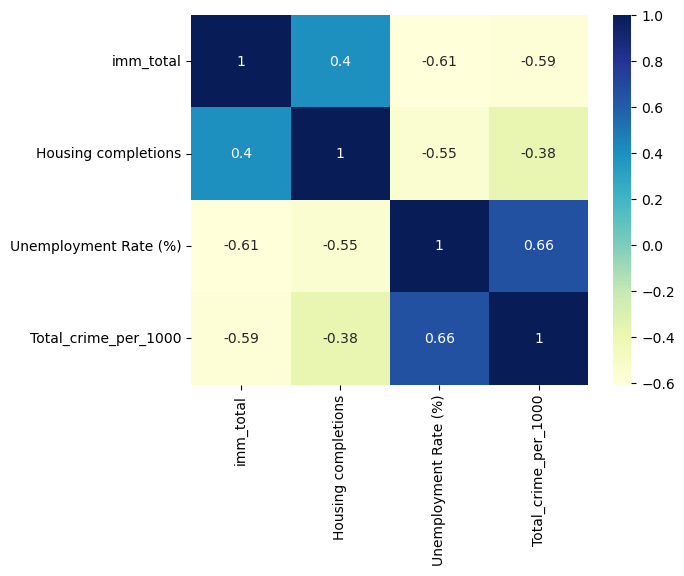

In [48]:
sns.heatmap(df[['imm_total', 'Housing completions', 'Unemployment Rate (%)', 'Total_crime_per_1000']].corr(), annot=True, cmap='YlGnBu')


The correlation value lies from -1 to 1 where -1 negatively correlates while +1 means positive correlation. Closer to -1 or 1 defines the strength of the relationship